In [1]:
%matplotlib notebook
import sys as sys
sys.path.append('scripts27/')
sys.path.append('scripts27/gauss_mix')

import pyglet as pgl
import numpy as np

from main import Main
import gmix_model as gmix
import gmix_sample_mixture as smpl
import graph_NPZ as graph_highD

Loading chipmunk for Darwin (64bit) [/Users/azane/GitRepo/spider/venv/lib/python2.7/site-packages/pymunk/libchipmunk.dylib]


In [2]:
main = Main()
pgl.app.run()

In [3]:
s_x, s_t = gmix.get_xt_from_npz('data/spi_data.npz', True)
xDims = np.array([0,1,2,-1]) #muscle, muscle, balance, time
s_x = s_x[:,xDims]

_, v, c, t, s = main.space.expHQ.graph_space(s_x)

main.space.expModel.build_graph()
m, v, u = main.space.expModel.get_xmvu()

#x, y = smpl.sample_expectation(t_x, m, v, u) #set to gmm sample
x, y = smpl.mixture_expectation(s_x, m, v, u) #set to gmm expectation
x, y_smpl = smpl.sample_mixture(s_x, m, v, u) #set to gmm expectation

<IPython.core.display.Javascript object>


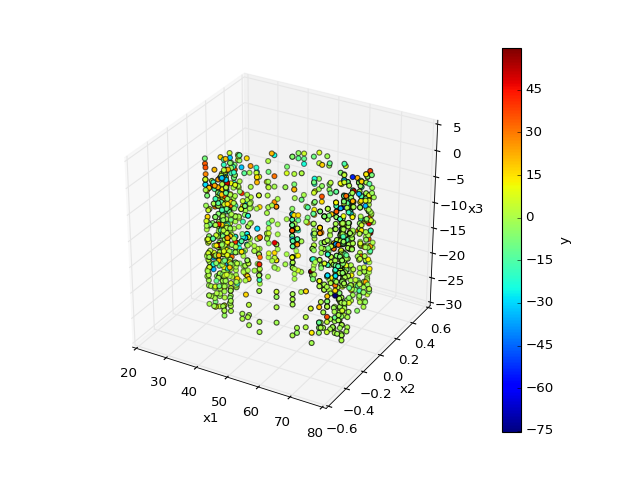

<IPython.core.display.Javascript object>


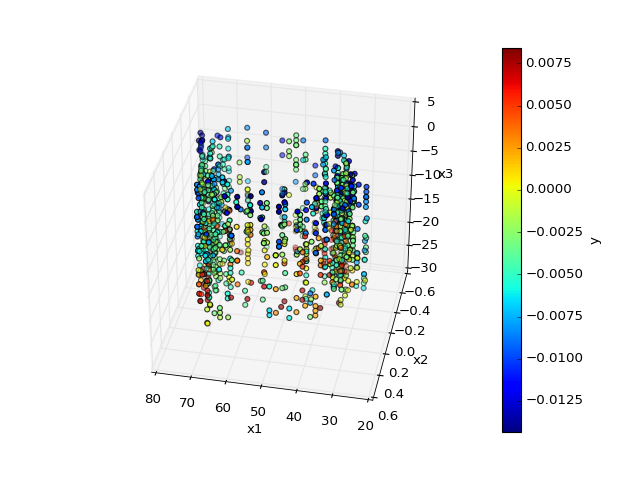

<IPython.core.display.Javascript object>


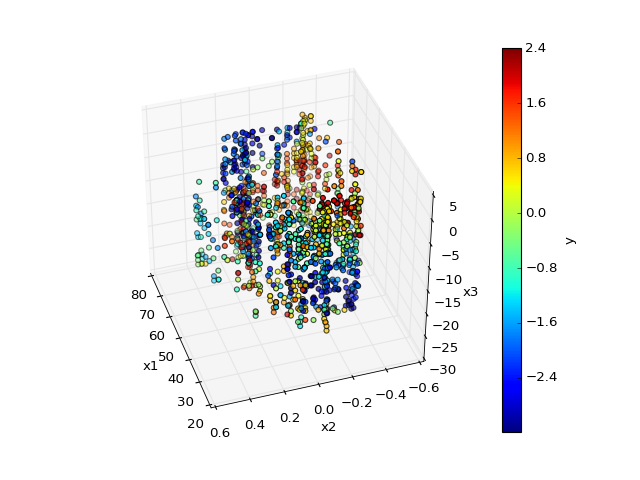

(<matplotlib.figure.Figure at 0x1275ceb10>,
 <mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x116820150>)

In [5]:
xCols = [1,2,-1]
yLow = None#-0.05
yHigh = None#0.05
numPoints = 600

#point value
#fig, _ = graph_highD.graph3x1y(s_x, v, xCols=xCols,
#                      sbpltLoc=221, numPoints=numPoints)
#graph_highD.graph3x1y(s_x, c, xCols=xCols, fig=fig,
#                      sbpltLoc=222, numPoints=numPoints)
#graph_highD.graph3x1y(s_x, t, xCols=xCols, fig=fig,
#                      sbpltLoc=223, numPoints=numPoints)
#graph_highD.graph3x1y(s_x, s, xCols=xCols, fig=fig,
#                      sbpltLoc=224, numPoints=numPoints)

#sensor sample
graph_highD.graph3x1y(s_x, y_smpl, xCols=xCols, fig=None,
                      sbpltLoc=111, numPoints=numPoints*2)
#sensor expecation
graph_highD.graph3x1y(s_x, y, xCols=xCols,
                      yLow=yLow, yHigh=yHigh, fig=None,
                      sbpltLoc=111, numPoints=numPoints*2)
#actual sensor
graph_highD.graph3x1y(s_x, s_t, xCols=xCols,
                      yLow=yLow, yHigh=yHigh, fig=None,
                      sbpltLoc=111, numPoints=numPoints*2)